In [1]:
from collections import Counter
import numpy as np
from copy import deepcopy
import re

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('WarAndPeace.txt', 'r') as f:
    text_1 = f.read()

with open('AnnaKarenina.txt' ,'r') as file:
    text_2 = file.read()
    
text = text_1 + ' ' + text_2
text = text.lower()
text = re.sub('[^а-я ]', ' ', text)
text = re.sub(' +', ' ', text).strip()

In [3]:
text_length = len(text)
symbols = sorted(set(text))
print(symbols)

[' ', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я']


In [4]:
def calc_base_freq(text):
    text_length = len(text)
    base_freq = Counter()
    base_freq.update(text)
    base_freq = {key: val/text_length for key, val in base_freq.items()}
    return base_freq

In [5]:
base_freq = calc_base_freq(text)
cond_freq = {prev_symbol: {cur_symb: 0 for cur_symb in symbols} for prev_symbol in symbols}
for i in range(1, text_length):
    prev_symb = text[i-1]
    cur_symb = text[i]
    cond_freq[prev_symb][cur_symb] += 1

for prev_symb in cond_freq.keys():
    total_sum = sum([freq for freq in cond_freq[prev_symb].values()])
    for key, val in cond_freq[prev_symb].items():
        cond_freq[prev_symb][key] = (cond_freq[prev_symb][key] + 1) / total_sum

In [6]:
base_order = deepcopy(symbols)

In [7]:
test_text = text[:306]
print(test_text)

война и мир самый известный роман льва николаевича толстого как никакое другое произведение писателя отражает глубину его мироощущения и философии эта книга из разряда вечных потому что она обо всем о жизни и смерти о любви и чести о мужестве и героизме о славе и подвиге о войне и мире первый том знакомит


In [8]:
def get_encoder(base_order=base_order, seed=42):
    np.random.seed(seed)
    new_order = deepcopy(base_order)
    np.random.shuffle(new_order)
    return {base: new for base, new in zip(base_order, new_order)}

encoder = get_encoder(base_order)
encode_text = ''.join(encoder[symbol] for symbol in test_text)
print(encode_text)

рчгкою юм бюьомягю лртьвкягюбчмокюджроюк пчдотр соювчдьвчзчюпопюк попчтюибъзчтюабч лртитк тюа ьовтдыючвбофотвюздъщ къютзчюм бччеъетк ыю юц дчьчц  юйвоюпк зою люболбыиоюртскяэюачвчмъюсвчючкоючщчюрьтмючюф лк ю юьмтбв ючюднщр ю юстьв ючюмъфтьвртю юзтбч лмтючюьдортю юачир зтючюрчгктю юм бтюатбрягювчмюлкопчм в


In [9]:
def calc_log_likelihood(decode_text, cond_freq=cond_freq):
    log_likelihood = 0
    for i in range(1, len(decode_text)):
        prev_symb = decode_text[i-1]
        cur_symb = decode_text[i]
        log_likelihood += np.log(cond_freq[prev_symb][cur_symb])
    return log_likelihood


def get_decode_text(encode_text, decoder):
    return [decoder[symbol] for symbol in encode_text]


def get_new_decoder(decoder):
    keys = []
    vals = []
    for key, val in decoder.items():
        keys.append(key)
        vals.append(val)
    index_1, index_2 = np.random.choice(len(decoder), size=2, replace=False)
    vals[index_1], vals[index_2] = vals[index_2], vals[index_1]
    new_decoder = {key:val for key, val in zip(keys, vals)}
    return new_decoder

## Задание 1

1) посчитаем частоты каждого токена в исходном тексте (война и мир + анна каренина)
2) посчитаем частоты каждого токена в зашивровоном тексте
3) осортируем по убыванию и замапим значения по порядку

In [10]:
test_text

'война и мир самый известный роман льва николаевича толстого как никакое другое произведение писателя отражает глубину его мироощущения и философии эта книга из разряда вечных потому что она обо всем о жизни и смерти о любви и чести о мужестве и героизме о славе и подвиге о войне и мире первый том знакомит'

In [11]:
encode_text

'рчгкою юм бюьомягю лртьвкягюбчмокюджроюк пчдотр соювчдьвчзчюпопюк попчтюибъзчтюабч лртитк тюа ьовтдыючвбофотвюздъщ къютзчюм бччеъетк ыю юц дчьчц  юйвоюпк зою люболбыиоюртскяэюачвчмъюсвчючкоючщчюрьтмючюф лк ю юьмтбв ючюднщр ю юстьв ючюмъфтьвртю юзтбч лмтючюьдортю юачир зтючюрчгктю юм бтюатбрягювчмюлкопчм в'

In [12]:
test_base_freq = calc_base_freq(encode_text)
keys = [key for key, val in sorted(test_base_freq.items(), key=lambda x: x[1], reverse=True)]
vals = [key for key, val in sorted(base_freq.items(), key=lambda x: x[1], reverse=True)]
decoder = {}
for key, val in zip(keys, vals):
    decoder[key] = val
    
    
print(''.join(get_decode_text(encode_text, decoder)))

сеяин о лов рнлгя одсартигя велни кхсн иомекнасоын текртеуе мнм иомнмеа бвпуеа ьвеодсабаиоа ьорнтакз етвнчнат укпжоип ауе ловеейпйаиоз о шокерешоо ютн миоун од вндвзбн саыигэ ьетелп ыте еин еже срал е чодио о рлавто е кцжсо о ыарто е лпчартса о уавеодла е ркнса о ьебсоуа е сеяиа о лова ьавсгя тел динмелот


## Задание 2

# Задание 3

1) Инициализируем декодер как в задании 1
2) считаем статистику по биграммам
3) заходим в цикл:
    1. считаем логарифм правдоподобия (по биграммам) для текущего декодера
    2. Генерируем новый декодер у которого случайно поменяли местами значения у 2 ключей
    3. считаем логарифм правдоподобия (по биграммам) для нового декодера
    4. с вероятностью p заменяем старый декодера на новый, где p = np.exp(new_log_likelihood - curent_log_likelihood)

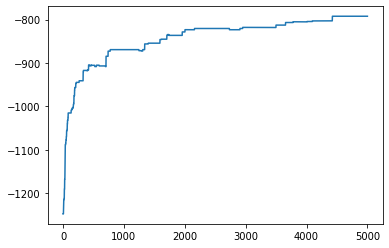

In [13]:
test_base_freq = calc_base_freq(encode_text)
keys = [key for key, val in sorted(test_base_freq.items(), key=lambda x: x[1], reverse=True)]
vals = [key for key, val in sorted(base_freq.items(), key=lambda x: x[1], reverse=True)]
decoder = {}
for key, val in zip(keys, vals):
    decoder[key] = val
    
decode_text = get_decode_text(encode_text, decoder)
curent_log_likelihood = calc_log_likelihood(decode_text)

num_iter = 5000
hist = [curent_log_likelihood]

for i in range(num_iter):
    decode_text = get_decode_text(encode_text, decoder)
    curent_log_likelihood = calc_log_likelihood(decode_text)
    
    new_decoder = get_new_decoder(decoder)
    new_decode_text = get_decode_text(encode_text, new_decoder)
    new_log_likelihood = calc_log_likelihood(new_decode_text)
    
    rand_prob = np.random.rand()
    if rand_prob < np.exp(new_log_likelihood - curent_log_likelihood):
        decoder = new_decoder
        curent_log_likelihood = new_log_likelihood
    
    hist.append(curent_log_likelihood)
plt.plot(hist)

Расшифровка тестового примера:

In [14]:
''.join(get_decode_text(encode_text, decoder))

'война и мир самый известный роман дьва никодаевича тодстоло как никакое хрулое произвехение писатедя отражает лдугину ело мирообубения и шидосошии эта книла из разряха вечныю потому что она ого всем о жизни и смерти о дцгви и чести о мужестве и лероизме о сдаве и похвиле о войне и мире первый том знакомит'

In [15]:
encode_text = '←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏'

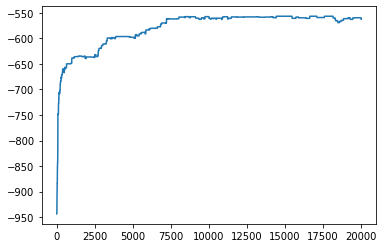

In [32]:
test_base_freq = calc_base_freq(encode_text)
keys = [key for key, val in sorted(test_base_freq.items(), key=lambda x: x[1], reverse=True)]
vals = [key for key, val in sorted(base_freq.items(), key=lambda x: x[1], reverse=True)]
decoder = {}
for key, val in zip(keys, vals):
    decoder[key] = val
    
decode_text = get_decode_text(encode_text, decoder)
curent_log_likelihood = calc_log_likelihood(decode_text)

num_iter = 20000
hist = [curent_log_likelihood]

for i in range(num_iter):
    decode_text = get_decode_text(encode_text, decoder)
    curent_log_likelihood = calc_log_likelihood(decode_text)
    
    new_decoder = get_new_decoder(decoder)
    new_decode_text = get_decode_text(encode_text, new_decoder)
    new_log_likelihood = calc_log_likelihood(new_decode_text)
    
    rand_prob = np.random.uniform(0, 1)
    if rand_prob < np.exp(new_log_likelihood - curent_log_likelihood):
        decoder = new_decoder
        curent_log_likelihood = new_log_likelihood
        
    
    hist.append(curent_log_likelihood)
plt.plot(hist)

Расшифровка закодированного сообщения:

In [34]:
''.join(get_decode_text(encode_text, decoder))

'если вы вимите нордальный или почти нордальный текст у зтого сообшения который легко прочитать скорее всего вы все смелали правильно и получите даксидальный балл жа послемнее четвертое жамание курса хотя конечно я ничего не обешаю'